**_NOTE:_** V1_Fruit_type_classifier 

Ml workflow - based on 

1. Looking at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system

In [1]:
%%capture
# CODE for running this notebook in google colab: please upload your kaggle.json API to /content/ to make this work
! pip install kaggle ; mkdir ~/.kaggle ; cp /content/kaggle.json ~/.kaggle ; kaggle datasets download moltean/fruits ; unzip fruits.zip ; mkdir /content/fruits-360_dataset/fruits-360/preview ;  

# install modules
!  pip install visualkeras ; !pip install ThreadedFileLoader # module for CNN visualization

# PROJECT STEPS
- Reading the data set and Introduction
- Exploratory Data Analysis with Pandas and NumPy
- Data Preparation using Sklearn
- Selecting and Training a few Machine Learning Models
- Cross-Validation and Hyperparameter Tuning using Sklearn
- eploying the Final Trained Model

## Looking at the big picture:

The problem: Fruits are often hard to classify manually given the wide variety of types, creating an automated classifier could help in the future, so that this task can be done instantly, the proposed dataset : <b> <i> Fruits 360 </i></b> , provides a lot of data to work with.

## Fruit Type Classification 🍉🍌🥭

Fruits 360 is a dataset with images of fruits, vegetables, and other plants

In [2]:
# Loading the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
import visualkeras
import pandas as pd
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input


# loading image modules
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#matplotlib styles
plt.style.use(['ggplot'])

In [3]:
#train_dir = 'data/fruits-360/Training'
#test_dir = 'data/fruits-360/Test/'

# Specify the train and test dir path

train_dir = '/content/fruits-360_dataset/fruits-360/Training'
test_dir = '/content/fruits-360_dataset/fruits-360/Test'

labels = list(filter(lambda x: os.path.isdir(os.path.join(train_dir, x)), os.listdir(train_dir)))
labels

# Listing all the fruits in the dataset

['Tomato Heart',
 'Lemon',
 'Lemon Meyer',
 'Cucumber Ripe',
 'Pear Stone',
 'Pineapple Mini',
 'Tomato 4',
 'Peach Flat',
 'Apple Golden 2',
 'Cantaloupe 2',
 'Eggplant',
 'Chestnut',
 'Kiwi',
 'Cocos',
 'Apple Red Yellow 2',
 'Onion White',
 'Grape Blue',
 'Apple Red 2',
 'Apple Braeburn',
 'Avocado ripe',
 'Apple Granny Smith',
 'Fig',
 'Apple Golden 1',
 'Maracuja',
 'Ginger Root',
 'Pear',
 'Pepino',
 'Clementine',
 'Nut Forest',
 'Apple Red 3',
 'Pear Williams',
 'Tomato Yellow',
 'Passion Fruit',
 'Banana Lady Finger',
 'Nectarine',
 'Mandarine',
 'Raspberry',
 'Orange',
 'Apricot',
 'Pear 2',
 'Plum',
 'Apple Pink Lady',
 'Mulberry',
 'Guava',
 'Nut Pecan',
 'Kohlrabi',
 'Potato Red Washed',
 'Grape White 4',
 'Tomato 2',
 'Corn',
 'Lychee',
 'Grape White 2',
 'Cherry 1',
 'Plum 3',
 'Tomato 1',
 'Grape White 3',
 'Hazelnut',
 'Cherry Rainier',
 'Banana Red',
 'Onion Red',
 'Potato Red',
 'Corn Husk',
 'Tamarillo',
 'Potato White',
 'Grapefruit Pink',
 'Peach',
 'Kaki',
 'Apple

In [ ]:
print(f"The are: {len(labels)} fruits to classify")

The are: 131 fruits to classify


## Exploratory Data Analysis

Answering a few questions with EDA
- Which fruit is the most common?
- Printing a random fruit for each type

**Printing random fruits:**

Now, let's visualize a random image from each of each fruit type:

In [ ]:
def print_fruits(rows,cols,  fruit_id = 0):
  sorted_fruits = sorted(os.listdir(train_dir))
  sorted_fruits
  for i in range(rows):
    for j in range(cols):
      try:
        selected_fruit = sorted_fruits[fruit_id] 
        fruit_id += 1
      except:
        break
      if selected_fruit == '.temp_store':
          continue
      food_selected_images = os.listdir(os.path.join(train_dir,selected_fruit)) 
      food_selected_random = np.random.choice(food_selected_images)
      img = plt.imread(os.path.join(train_dir,selected_fruit, food_selected_random))

      ax[i][j].imshow(img)
      ax[i][j].set_title(selected_fruit, pad = 10)

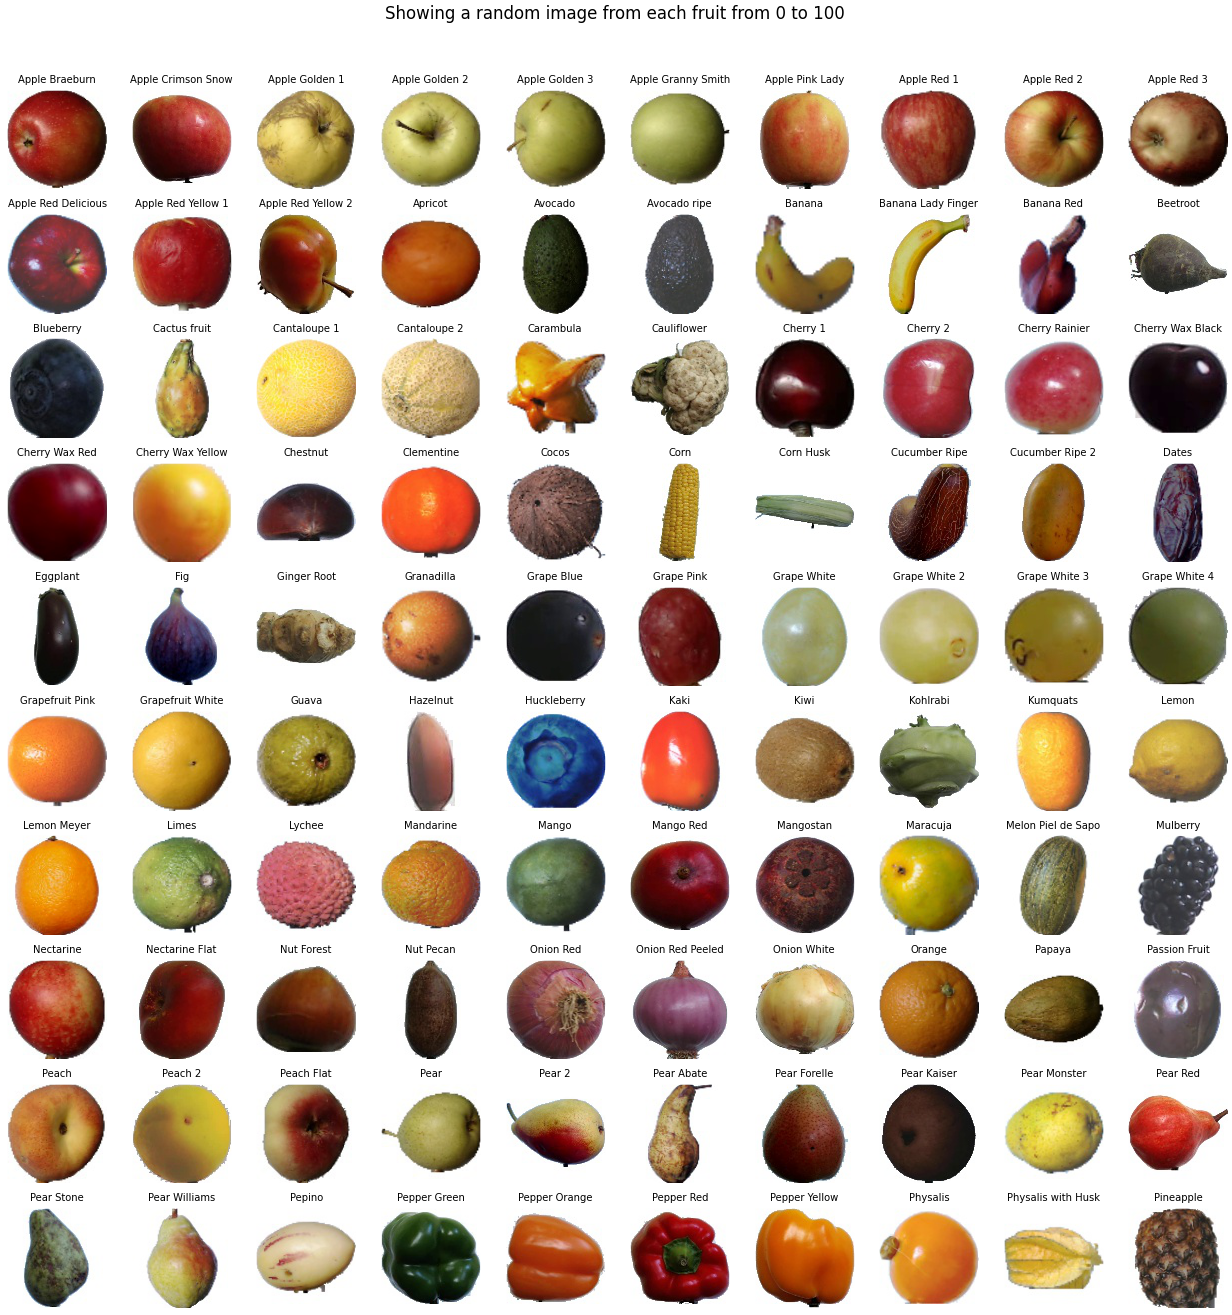

In [ ]:
rows = 10
cols = 10
# 10 x 10 fruit grid
fig,ax = plt.subplots(rows,cols,figsize =(25,25), dpi=50)

fig.suptitle('Showing a random image from each fruit from 0 to 100',y=1.05,fontsize=24)

print_fruits(rows,cols,0) # start from 0
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html



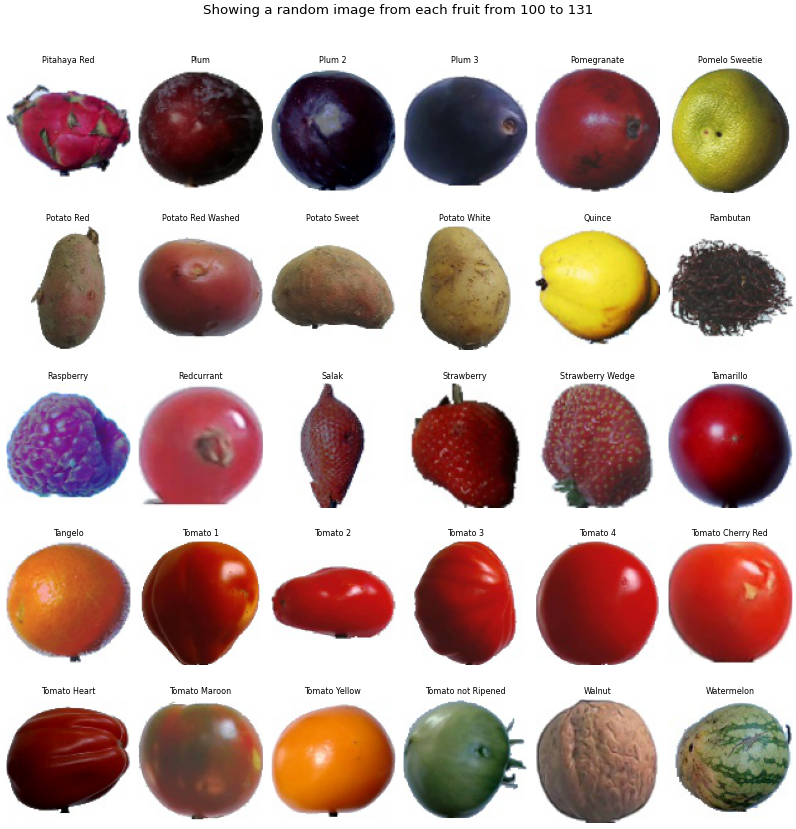

In [ ]:
rows = 5
cols = 6
# 6 x 6 fruit grid
fig,ax = plt.subplots(rows,cols,figsize =(20,20), dpi=40)

fig.suptitle('Showing a random image from each fruit from 100 to 131',y=1.05,fontsize=24)

print_fruits(rows,cols,101) # start from 101
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


### Which fruit is more common ?

In [ ]:
train_count = {}
test_count = {}
count_validation = {}
count_total = {}

# 
for fruit in labels:
    train_count[fruit] = len(os.listdir(os.path.join(train_dir,fruit)))
    test_count[fruit] = len(os.listdir(os.path.join(test_dir,fruit)))

count_total['Test'] = test_count
count_total['Training'] = train_count



df = pd.DataFrame.from_dict(count_total)


<AxesSubplot:>

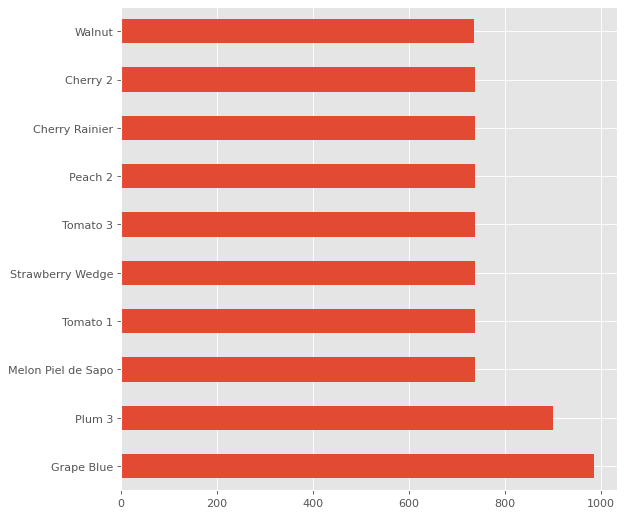

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

df['Training'].sort_values(ascending=False).head(10).plot(kind='barh')

`Grape Blue` seems to be the fruit with the most data.

<AxesSubplot:>

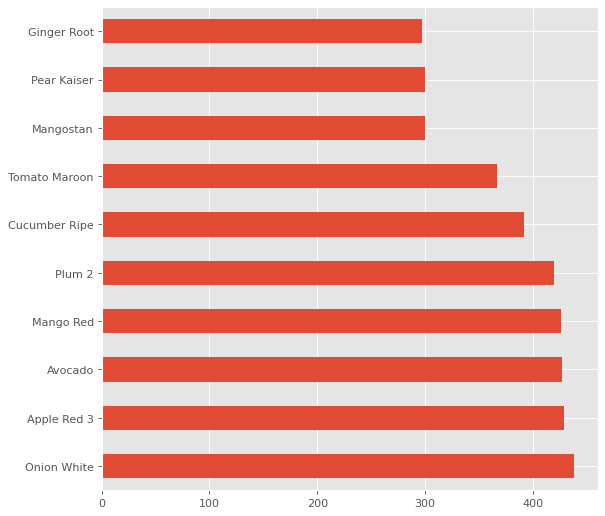

In [ ]:

figure(figsize=(8, 8), dpi=80)

df['Training'].sort_values(ascending=False).tail(10).plot(kind='barh')




`Ginger Root ` , seems to be the fruit with the least ammount of data.

## Loading the data and Transfer Learning test (XCeption)

### Using ImageDataGenerator to read images

In [4]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #split for validation
    validation_split=0.2)

train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    shuffle=True,# IMPORTANT , shuffle the dataset
    subset='training'# set as training data
)

Found 54190 images belonging to 131 classes.


In [5]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True
)


Found 22688 images belonging to 131 classes.


In [6]:
val_ds = train_gen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(100, 100),
    batch_size=32,
    subset='validation') # set as validation data

Found 13502 images belonging to 131 classes.


### First Model Using XCeption

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(100, 100, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(100, 100, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(131,activation='softmax')(vectors)

model = keras.Model(inputs, outputs)


In [ ]:
learning_rate = 0.1
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
 

Epoch 1/10
1694/1694 [==============================] - 65s 37ms/step - loss: 12.4351 - accuracy: 0.8596 - val_loss: 24.2849 - val_accuracy: 0.7111
Epoch 2/10
1694/1694 [==============================] - 62s 36ms/step - loss: 1.7188 - accuracy: 0.9717 - val_loss: 23.8677 - val_accuracy: 0.7422
Epoch 3/10
1694/1694 [==============================] - 62s 36ms/step - loss: 0.9634 - accuracy: 0.9834 - val_loss: 26.3385 - val_accuracy: 0.7267
Epoch 4/10
1692/1694 [============================>.] - ETA: 0s - loss: 0.6464 - accuracy: 0.9879

KeyboardInterrupt: ignored

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='train accuracy')

plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10))
plt.legend()


In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['loss'],'+', label='train accuracy')

plt.plot(history.history['val_loss'],  label='validation accuracy',color='green')
plt.xticks(np.arange(10))
plt.legend()


The model is overfitting a bit,different techniques can be applied to help with this problem.


In [ ]:
model.evaluate(test_ds)


The non-tuned model of X-ceptionV3 obtained an accuracy of `0.7652`  with the test dataset, this should be improved with hyperparameter tunning.

## Testing this first dummy model.

We will select a fruit inside the test dataset to see what will our model predict:

In [ ]:
# path = 'data/fruits-360/Test/Watermelon/131_100.jpg'
path = '/content/fruits-360_dataset/fruits-360/Test/Apple Golden 3/311_100.jpg'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img


Loading and visualizing the image.

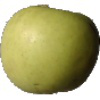

In [ ]:
img = load_img(path, target_size=(100, 100))
img

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 100, 100, 3)

In [ ]:
X = preprocess_input(X)


In [ ]:
pred = model.predict(X)


In [ ]:
d = dict(zip(test_ds.class_indices, pred[0]))


NameError: ignored

In [ ]:
sorted(d.items(), key=lambda x: x[1], reverse=True)



## Visualizing this model with Visualkeras

Within this section I used the visualkeras package to help visualize the CNN more easily, with this tool we can see the model defined in a neat graphical way.

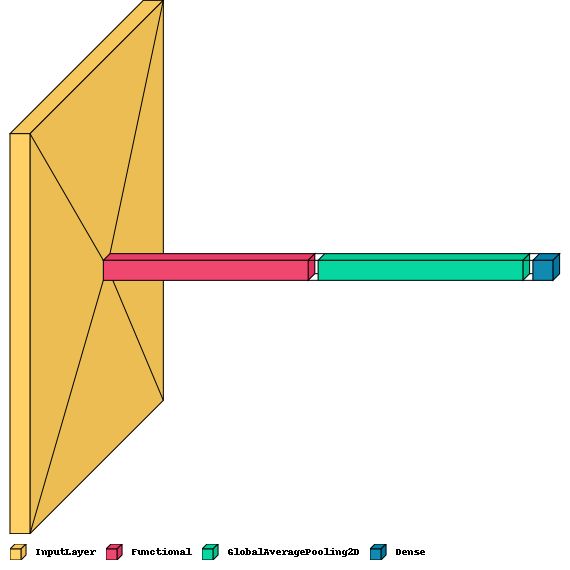

In [ ]:
visualkeras.layered_view(model).show()
visualkeras.layered_view(model,legend=True)


- Input Layer :
- Pooling : turning the 3 dimensional into 1D 
- Dense Layer : Turn vectors into predications

## Hyper-parameter tunning (XCeption)

In [ ]:
def build_model(alpha=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )

    base_model.trainable = False

    # actual model 



    inputs = keras.Input(shape=(100, 100, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(131,activation='softmax')(vectors)
    model = keras.Model(inputs, outputs)
    optimizer = keras.optimizers.RMSprop(learning_rate=alpha)

    loss = keras.losses.CategoricalCrossentropy(from_logits=False)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])



    return model


In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = build_model(alpha=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()


0.0001
Epoch 1/10
1694/1694 [==============================] - 59s 33ms/step - loss: 0.9596 - accuracy: 0.8321 - val_loss: 0.3289 - val_accuracy: 0.9273
Epoch 2/10
1694/1694 [==============================] - 55s 32ms/step - loss: 0.1306 - accuracy: 0.9786 - val_loss: 0.2095 - val_accuracy: 0.9445
Epoch 3/10
1694/1694 [==============================] - 55s 33ms/step - loss: 0.0601 - accuracy: 0.9901 - val_loss: 0.1804 - val_accuracy: 0.9499
Epoch 4/10
1694/1694 [==============================] - 55s 33ms/step - loss: 0.0348 - accuracy: 0.9947 - val_loss: 0.1576 - val_accuracy: 0.9535
Epoch 5/10
1694/1694 [==============================] - 55s 32ms/step - loss: 0.0233 - accuracy: 0.9964 - val_loss: 0.1584 - val_accuracy: 0.9556
Epoch 6/10
1694/1694 [==============================] - 54s 32ms/step - loss: 0.0167 - accuracy: 0.9972 - val_loss: 0.1421 - val_accuracy: 0.9597
Epoch 7/10
1694/1694 [==============================] - 55s 32ms/step - loss: 0.0126 - accuracy: 0.9978 - val_loss: 0

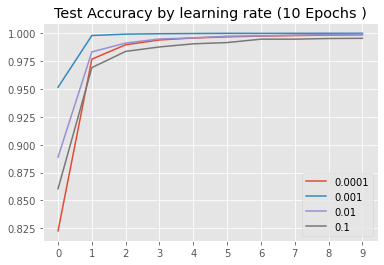

In [ ]:
for lr,hist in scores.items():
    plt.plot(hist['accuracy'],label=lr)

plt.title("Test Accuracy by learning rate (10 Epochs )")
plt.xticks(np.arange(10))

plt.legend()

Accuracy on the test dataset seems to be extremely similar across all learning rates, with 0.001 performing a bit better.

### Loss on validation dataset

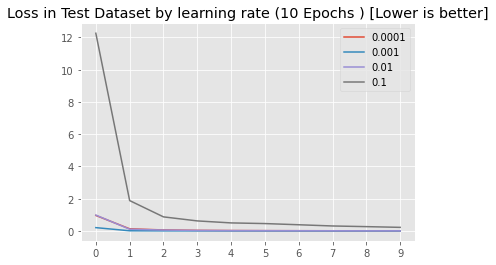

In [ ]:
for lr,hist in scores.items():
    plt.plot(hist['loss'],label=lr)

plt.title("Loss in Test Dataset by learning rate (10 Epochs ) [Lower is better]")
plt.xticks(np.arange(10))

plt.legend()

### Validation dataset

lr:  0.0001 0.9618574976921082
lr:  0.001 0.9727447628974915
lr:  0.01 0.9658569097518921
lr:  0.1 0.9616352915763855


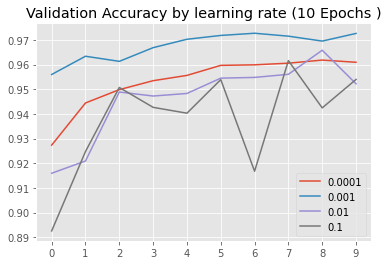

In [ ]:
for lr,hist in scores.items():
    plt.plot(hist['val_accuracy'],label=lr)
    best_score = max(hist['val_accuracy'])
    print('lr: ',lr,best_score)

    
  


plt.title("Validation Accuracy by learning rate (10 Epochs )")
plt.xticks(np.arange(10))


plt.legend()

A learning rate of `0.001` got a max score of around 97.27 % on the `validation` dataset , effectively improving the previous score of 95.18 by around 2 %. 


lr:  0.1 0.9616352915763855


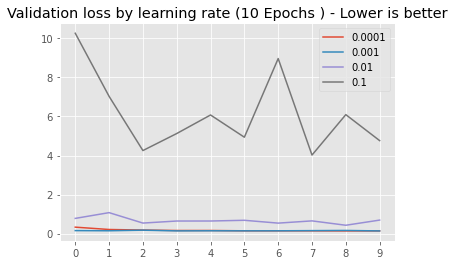

In [ ]:
for lr,hist in scores.items():
    plt.plot(hist['val_loss'],label=lr)
    
  


plt.title("Validation loss by learning rate (10 Epochs ) - Lower is better")
plt.xticks(np.arange(10))

best_score = max(hist['val_accuracy'])
print('lr: ',lr,best_score)

plt.legend()

Simmilarly, the loss is quite high for a 0.1 learning rate, not ideal,however is not much clear which learning rate got the lowest loss.


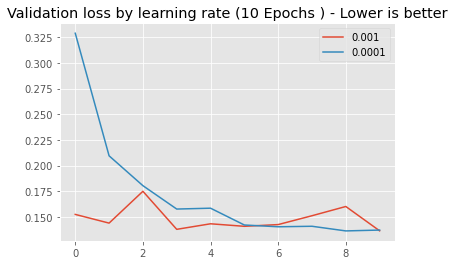

In [ ]:
hist = scores[0.001]
plt.plot(hist['val_loss'], label=0.001)


hist = scores[0.0001]
plt.plot(hist['val_loss'], label=0.0001)

plt.title("Validation loss by learning rate (10 Epochs ) - Lower is better")

plt.legend()


`0.0001` has a bit more loss in certain areas , but looks like a more steep curve , so this would be the learning rate used moving forward.

## Model Checkpoint

A learning rate of `0.0001 ` seems to be the best one here , let's look on it a bit more , and save the best result using Model Checkpoint.


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'data/models/Xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True, # save best model
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
alpha = 0.0001 

model = build_model(alpha=alpha)

history=model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks = [checkpoint]
)

Epoch 1/10
1692/1694 [============================>.] - ETA: 0s - loss: 0.9749 - accuracy: 0.8257

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1694/1694 [==============================] - 59s 33ms/step - loss: 0.9740 - accuracy: 0.8259 - val_loss: 0.3498 - val_accuracy: 0.9121
Epoch 2/10
1694/1694 [==============================] - 56s 33ms/step - loss: 0.1331 - accuracy: 0.9787 - val_loss: 0.2165 - val_accuracy: 0.9403
Epoch 3/10
1694/1694 [==============================] - 56s 33ms/step - loss: 0.0613 - accuracy: 0.9903 - val_loss: 0.1724 - val_accuracy: 0.9508
Epoch 4/10
1694/1694 [==============================] - 55s 32ms/step - loss: 0.0361 - accuracy: 0.9939 - val_loss: 0.1632 - val_accuracy: 0.9499
Epoch 5/10
1694/1694 [==============================] - 56s 33ms/step - loss: 0.0241 - accuracy: 0.9960 - val_loss: 0.1543 - val_accuracy: 0.9525
Epoch 6/10
1694/1694 [==============================] - 57s 34ms/step - loss: 0.0171 - accuracy: 0.9971 - val_loss: 0.1472 - val_accuracy: 0.9542
Epoch 7/10
1694/1694 [==============================] - 57s 34ms/step - loss: 0.0130 - accuracy: 0.9976 - val_loss: 0.1430 - val_accura

In [ ]:
# model = tf.keras.models.load_model('Xception_v1_04_0.836.h5')

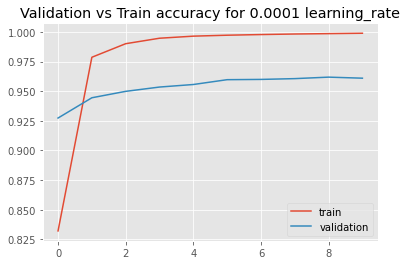

In [ ]:

plt.plot(hist['accuracy'], label="train")
plt.plot(hist['val_accuracy'], label="validation")
plt.title("Validation vs Train accuracy for 0.0001 learning_rate")

plt.legend()

plt.show()

Text(0.5, 1.0, 'Validation loss by learning rate (10 Epochs ) - Lower is better')

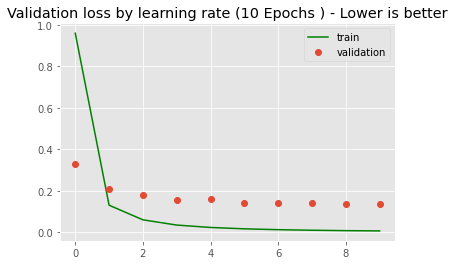

In [ ]:
plt.plot(hist['loss'],'r',color='green', label="train")
plt.plot(hist['val_loss'],'o', label="validation")
plt.legend()
plt.title("Validation loss by learning rate (10 Epochs ) - Lower is better")

The model definitely improved in performance, however the plots seem to indicate overfitting.

This is because this model hasn't used any data augmentation yet, this step, according to <b>François Chollet's Deep Learning with Python: </b>
is essential for preventing overfitting with small image dataset

---



Before that, we should experiment adding more layers.

## Adding More Layers

Adding more layers is done to increase the capacity of the network, and it's a classic way of building more powerful recurrent networks.

In [ ]:
def build_model(alpha=0.001,size_inner=100):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )

    base_model.trainable = False

    # actual model 
    inputs = keras.Input(shape=(100, 100, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # add activation function
    

    outputs = keras.layers.Dense(131, activation='softmax')(inner)
    
    
    model = keras.Model(inputs, outputs)
    # adding a inner layer

    optimizer = keras.optimizers.RMSprop(learning_rate=alpha)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [ ]:
alpha=0.0001


score={}

for size in [256,512,1024]:
    print(size)
    model = build_model(alpha=alpha,size_inner=size)
    history = model.fit(train_ds,epochs=10,validation_data=val_ds)
    score[size] = history.history
    print()
    print()

256
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1694/1694 [==============================] - 46s 26ms/step - loss: 0.8771 - accuracy: 0.8422 - val_loss: 0.2544 - val_accuracy: 0.9366
Epoch 2/10
1694/1694 [==============================] - 43s 25ms/step - loss: 0.0570 - accuracy: 0.9943 - val_loss: 0.1567 - val_accuracy: 0.9578
Epoch 3/10
1694/1694 [==============================] - 43s 25ms/step - loss: 0.0159 - accuracy: 0.9988 - val_loss: 0.1363 - val_accuracy: 0.9605
Epoch 4/10
1694/1694 [==============================] - 43s 25ms/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.1224 - val_accuracy: 0.9674
Epoch 5/10
1694/1694 [==============================] - 43s 25ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.1053 - val_accuracy: 0.9687
Epoch 6/10
1694/1694 [==============================] - 44s 26ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.1143 - val_accuracy: 0.9676
Epoch 7/10
1694/1694 [==============================] - 43s 25ms/step - loss: 8.5015e-04 - accuracy: 0.9999 - val_loss: 0.1252 - val_ac

### Visualizing this new layer

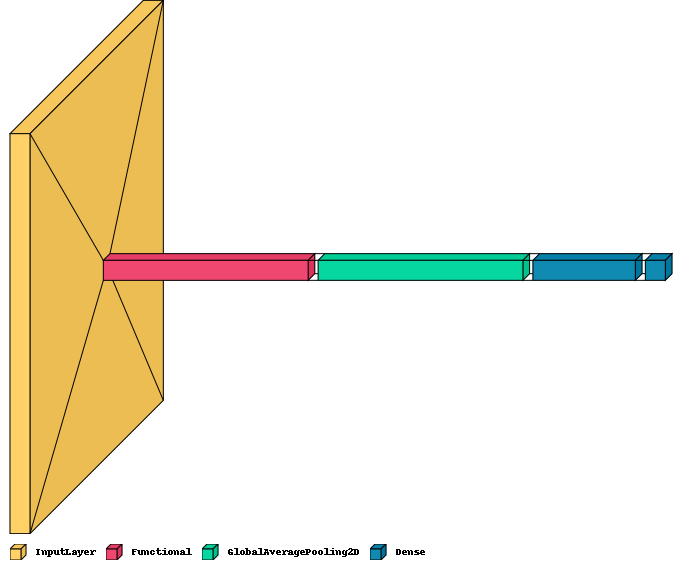

In [ ]:
visualkeras.layered_view(model).show()
visualkeras.layered_view(model,legend=True)


Text(0.5, 1.0, 'Validation Accuracy by inner size [10 Epochs] ')

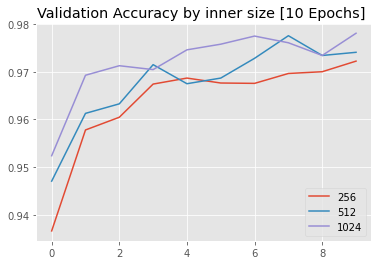

In [ ]:
for size,hist in score.items():
    plt.plot(hist['val_accuracy'],label=size)
plt.legend()
plt.title("Validation Accuracy by inner size [10 Epochs] ")



Text(0.5, 1.0, 'Validation Loss by inner size [10 Epochs] ')

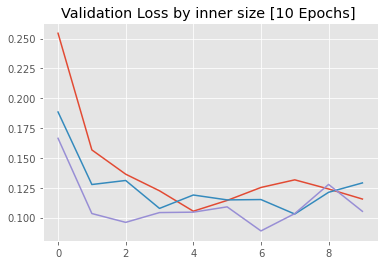

In [ ]:
for size,hist in score.items():
    plt.plot(hist['val_loss'],label=size)

plt.title("Validation Loss by inner size [10 Epochs] ")

Accuracy definitely improved a bit using an inner of `size=1024`

In [ ]:
saved_score = {}

saved_score = score[1024]
  

## Adding Dropout and Regularization

Dropout helps "knocking" random units of the network, using a smaller neural network, could help doing a regularization effect.


>  The term “dropout” refers to dropping out units (hidden and visible) in a 
neural network.

***Dropout: A Simple Way to Prevent Neural Networks from Overfitting, 2014.***

In [26]:
def build_model(alpha=0.001,size_inner=100,droprate=0.5):
    # LOAD XCeption pre-trained
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )
    base_model.trainable = False

    # actual model 
    inputs = keras.Input(shape=(100, 100, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # adding an inner layer

    drop = keras.layers.Dropout(droprate)(inner)  # adding dropout layer

    outputs = keras.layers.Dense(131,activation='softmax')(drop)  # add activation function to output    

    
    
    model = keras.Model(inputs, outputs)
    optimizer = keras.optimizers.RMSprop(learning_rate=alpha)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


    return model

In [27]:
learning_rate = 0.0001
size_inner=1024


scores = {}

for droprate in [0.2, 0.5, 0.8]:
    print(droprate)

    model = build_model(
        alpha=learning_rate,
        size_inner=size_inner,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()


0.2
83697664/83683744 [==============================] - 0s 0us/step
Epoch 1/10
1694/1694 [==============================] - 55s 27ms/step - loss: 0.5273 - accuracy: 0.8885 - val_loss: 0.1610 - val_accuracy: 0.9573
Epoch 2/10
1694/1694 [==============================] - 45s 26ms/step - loss: 0.0332 - accuracy: 0.9928 - val_loss: 0.1208 - val_accuracy: 0.9661
Epoch 3/10
1694/1694 [==============================] - 44s 26ms/step - loss: 0.0113 - accuracy: 0.9976 - val_loss: 0.1173 - val_accuracy: 0.9662
Epoch 4/10
1694/1694 [==============================] - 44s 26ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.1099 - val_accuracy: 0.9692
Epoch 5/10
1694/1694 [==============================] - 44s 26ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.1128 - val_accuracy: 0.9721
Epoch 6/10
1694/1694 [==============================] - 44s 26ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.1174 - val_accuracy: 0.9687
Epoch 7/10
1694/1694 [==============================] -

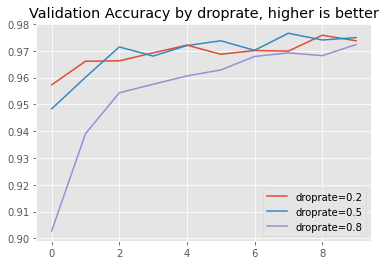

In [28]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('droprate=%s' % droprate))
plt.title("Validation Accuracy by droprate, higher is better")
plt.legend()

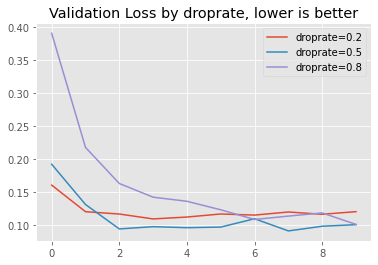

In [29]:
for droprate, hist in scores.items():
    plt.plot(hist['val_loss'], label=('droprate=%s' % droprate))
plt.title("Validation Loss by droprate, lower is better")
plt.legend()

Droprate of 0.8 is crearly a bit too much , and even though the loss curve looks to be decreasing, it's way too slow compared to the other droprate values.

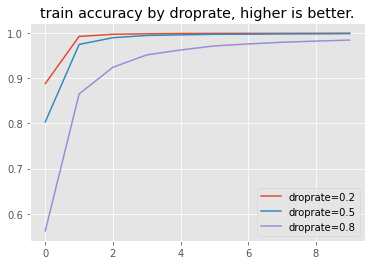

In [30]:
for droprate, hist in scores.items():
    plt.plot(hist['accuracy'], label=('droprate=%s' % droprate))
plt.title("train accuracy by droprate, higher is better.")
plt.legend()

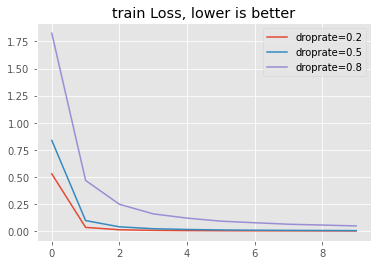

In [31]:
for droprate, hist in scores.items():
    plt.plot(hist['loss'], label=('droprate=%s' % droprate))
plt.title("train Loss, lower is better")
plt.legend()

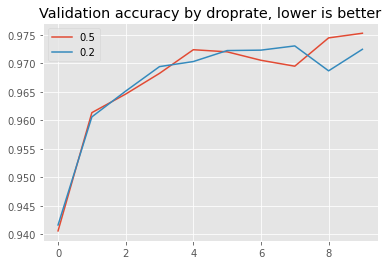

In [ ]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)


hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.title("Validation accuracy by droprate, lower is better")

plt.legend()

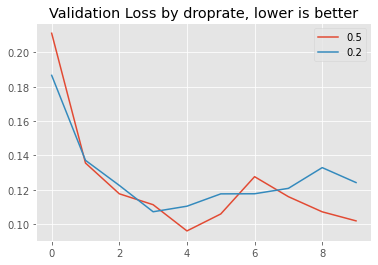

In [ ]:
hist = scores[0.5]
plt.plot(hist['val_loss'], label=0.5)


hist = scores[0.2]
plt.plot(hist['val_loss'], label=0.2)

plt.title("Validation Loss by droprate, lower is better")

plt.legend()

#### Effect of adding dropout vs the original model without dropout

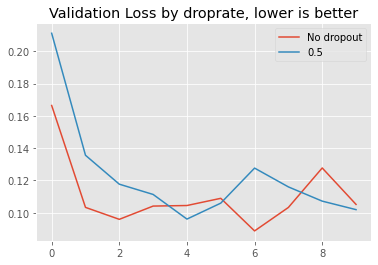

In [ ]:
hist = saved_score
plt.plot(hist['val_loss'], label="No dropout")

plt.title("Validation Loss by droprate, lower is better")

hist = scores[0.5]
plt.plot(hist['val_loss'], label=0.5)

plt.legend()

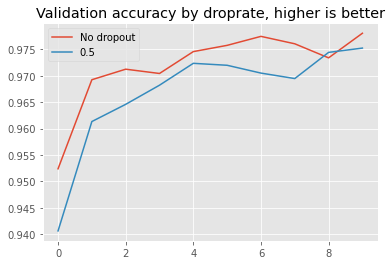

In [ ]:
hist = saved_score
plt.plot(hist['val_accuracy'], label="No dropout")

plt.title("Validation accuracy by droprate, higher is better")

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()

In [33]:
import warnings


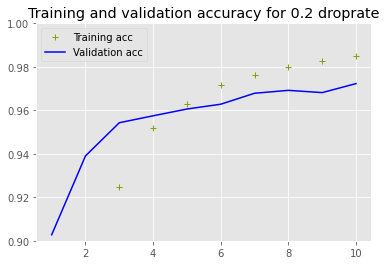

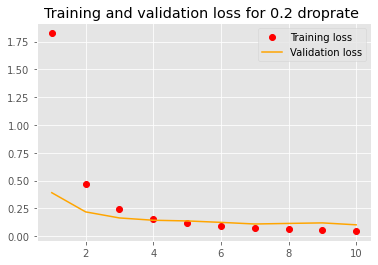

In [36]:
warnings.filterwarnings("ignore")


def display_drop(droprate_r):
    for droprate, hist in scores.items():
        if(droprate == droprate_r):
            
            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            loss = history.history['loss']

            val_loss = history.history['val_loss']
            epochs = range(1, len(acc) + 1)

            plt.plot(epochs, acc, '+', label='Training acc' , color='#8ba000')
            plt.plot(epochs, val_acc, 'b', label='Validation acc')
            plt.title('Training and validation accuracy for 0.2 droprate')
            plt.legend()

            plt.ylim(0.9, 1)

            
            plt.figure()
            plt.plot(epochs, loss, 'bo', label='Training loss' , color='red')
            plt.plot(epochs, val_loss, 'b', label='Validation loss',color='orange')
            plt.title('Training and validation loss for 0.2 droprate ')
            plt.legend()


            plt.show();


display_drop(0.2) 

Much more close curves here. The next step should be data augmentation.

## Data Augmentation

In [61]:
# Apply the augmentations on the TRAIN dataset only
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=40,
        brightness_range=[0.2,0.8],# apply brightness change,
        horizontal_flip=True, # flip left to right
        validation_split=0.2,
        fill_mode='nearest'

)



In [21]:
!pip install ThreadedFileLoader

In [62]:

# modules necessary for loading the preview data augmentated images
from ThreadedFileLoader.ThreadedFileLoader import *
from mpl_toolkits.axes_grid1 import ImageGrid


In [63]:
! rm -rf /content/fruits-360_dataset/fruits-360/preview 

In [64]:
! mkdir /content/fruits-360_dataset/fruits-360/preview

In [65]:
# loading an example image to visualize the data augmentation

img= load_img(train_dir+'/Apple Braeburn/0_100.jpg')
X = img_to_array(img)
X = X.reshape((1,) + X.shape) # img shape (1,3,100,100)



i = 0
for batch in train_datagen.flow(X, batch_size=1,
                          save_to_dir='/content/fruits-360_dataset/fruits-360/preview', save_prefix='apple', save_format='jpeg'):
    i += 1
    if i > 20:
        break  


In [66]:
instance = ThreadedImageLoader("/content/fruits-360_dataset/fruits-360/preview/*.jpeg")
instance.start_loading()
images = instance.loaded_objects

/content/fruits-360_dataset/fruits-360/preview/apple_0_557.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_6235.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_6935.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_8022.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_6689.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_4626.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_5653.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_6.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_9091.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_9394.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_5522.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_2746.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_5852.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_44.jpeg
/content/fruits-360_dataset/fruits-360/preview/apple_0_5545.jpeg
/content/fruits-360_dataset/fru

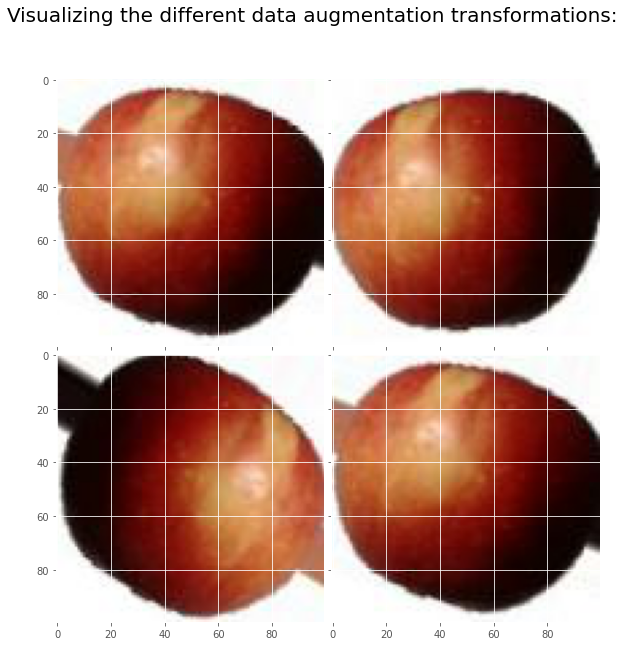

In [67]:
fig = plt.figure(figsize=(10., 10.))
fig.suptitle("Visualizing the different data augmentation transformations:  ", fontsize = 20)

grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2
                 , 2),
                 axes_pad=0.1,
                 )

for ax, im in zip(grid, images):
    ax.imshow(im)
plt.show()

In [68]:

train_ds_aug = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(100, 100),
                    batch_size=32,
                    shuffle=True,# IMPORTANT , shuffle the dataset
                    class_mode='categorical',
                    subset='training')



Found 54190 images belonging to 131 classes.


In [69]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                      
)

test_ds = test_gen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    shuffle=True)

Found 22688 images belonging to 131 classes.


In [70]:
val_ds_aug = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(100, 100),
    batch_size=32,
    subset='validation',
    ) # set as validation data

Found 13502 images belonging to 131 classes.


### Checkpointing the best obtained model (XCeption)

In [73]:
!rm -rf /content/fruits-360_dataset/fruits-360/models/

In [74]:
!mkdir /content/fruits-360_dataset/fruits-360/models/

In [75]:
checkpoint = keras.callbacks.ModelCheckpoint(
    '/content/fruits-360_dataset/fruits-360/models/xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [76]:
alpha = 0.0001
droprate = 0.5 # defined drop rate
size_inner=1024

model = build_model(
    alpha=alpha,
    size_inner=size_inner,
    droprate=droprate
)

history = model.fit(train_ds_aug, epochs=20, validation_data=val_ds_aug,callbacks=[checkpoint])


Epoch 1/20
1694/1694 [==============================] - 201s 117ms/step - loss: 1.2008 - accuracy: 0.7084 - val_loss: 0.3679 - val_accuracy: 0.9050
Epoch 2/20
1694/1694 [==============================] - 198s 117ms/step - loss: 0.2909 - accuracy: 0.9152 - val_loss: 0.2638 - val_accuracy: 0.9197
Epoch 3/20
1694/1694 [==============================] - 197s 117ms/step - loss: 0.1709 - accuracy: 0.9497 - val_loss: 0.2159 - val_accuracy: 0.9368
Epoch 4/20
1694/1694 [==============================] - 197s 116ms/step - loss: 0.1210 - accuracy: 0.9630 - val_loss: 0.1930 - val_accuracy: 0.9421
Epoch 5/20
1694/1694 [==============================] - 196s 116ms/step - loss: 0.0968 - accuracy: 0.9695 - val_loss: 0.1690 - val_accuracy: 0.9489
Epoch 6/20
1694/1694 [==============================] - 196s 116ms/step - loss: 0.0821 - accuracy: 0.9742 - val_loss: 0.1823 - val_accuracy: 0.9476
Epoch 7/20
1694/1694 [==============================] - 196s 115ms/step - loss: 0.0666 - accuracy: 0.9784 - val_

After quite a long execution time, eventually the best accuracy achieved is $0.898\%$, improvement over the accuracy seems to get quite stale after the 10th epoch.

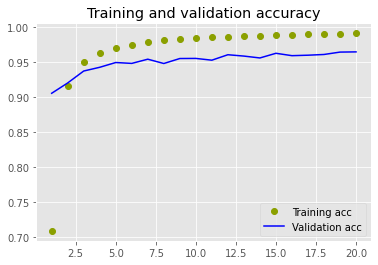

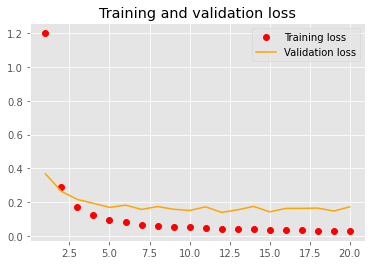

In [77]:

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc' , color='#8ba000')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()



plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss' , color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='orange')
plt.title('Training and validation loss')
plt.legend()



plt.show()

We can clearly see that now, the plots representing the model obtained are  less characteristic of overfitting, thanks to data augmentation and the other techniques applied, the curves represented here are much more close.


Also, worthy of note, the improvement of accuracy is quite slow after the 10th epoch, however since it peaked at 28th epoch it may be beneficial to run it more, to see if more improvement could be made with this particular model.

## Prediction Test with XCeption 

In [125]:
model = tf.keras.models.load_model('/content/fruits-360_dataset/fruits-360/models/xception_v1_20_0.964.h5')


Now, let's make some predictions 🍉

In [126]:
path = '/content/fruits-360_dataset/fruits-360/testing_new/0000000040500_CL_hyvee2_default_large.png'
img = load_img(path, target_size=(100, 100))
x = np.array(img)
X = np.array([x])
X.shape
X = preprocess_input(X)


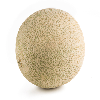

In [127]:
img

In [128]:
pred = model.predict(X)


In [131]:
d = dict(zip(train_ds_aug.class_indices, pred[0]))
sorted(d.items(), key=lambda x: x[1], reverse=True)


[('Cantaloupe 2', 0.82248867),
 ('Cantaloupe 1', 0.17619005),
 ('Avocado', 0.00072002097),
 ('Kiwi', 0.00030942683),
 ('Grape White 4', 0.00026859686),
 ('Cucumber Ripe', 5.9694053e-06),
 ('Melon Piel de Sapo', 5.3972713e-06),
 ('Salak', 4.5439874e-06),
 ('Grape White 3', 3.6356853e-06),
 ('Nut Pecan', 2.5668216e-06),
 ('Pear Forelle', 7.474552e-07),
 ('Tomato 4', 2.1438815e-07),
 ('Pear', 8.587446e-08),
 ('Cocos', 3.34738e-08),
 ('Plum 3', 9.804511e-09),
 ('Grape White 2', 4.4354524e-09),
 ('Tomato 1', 7.0215467e-10),
 ('Lychee', 6.540109e-10),
 ('Peach 2', 5.993122e-10),
 ('Pear 2', 5.5589944e-10),
 ('Grape White', 3.9345258e-10),
 ('Strawberry Wedge', 3.919725e-10),
 ('Potato Sweet', 2.064573e-10),
 ('Grape Blue', 1.7244627e-10),
 ('Banana', 9.100324e-11),
 ('Rambutan', 7.335784e-11),
 ('Apple Granny Smith', 4.6207652e-11),
 ('Avocado ripe', 3.1863838e-11),
 ('Pepper Orange', 2.6761714e-11),
 ('Tomato 2', 1.7201586e-11),
 ('Pepper Yellow', 1.576388e-11),
 ('Tomato 3', 1.5312017e-11)

In [130]:
model.evaluate(test_ds)


709/709 [==============================] - 15s 21ms/step - loss: 0.3952 - accuracy: 0.9294


[0.3952096998691559, 0.929434061050415]